<a href="https://colab.research.google.com/github/Ovocode05/NeuroDeff/blob/main/LTNE_model1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
from itertools import product
import math
import pathlib
import os
import tensorflow as tf

In [3]:
!pip install deepxde

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.2/194.2 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 11.3 MB/s eta 0:00:00


In [4]:
import deepxde as dde

Using backend: tensorflow.compat.v1
Other supported backends: tensorflow, pytorch, jax, paddle.
paddle supports more examples now and is recommended.
Instructions for updating:
non-resource variables are not supported in the long term


No backend selected.
Finding available backend...
Found tensorflow.compat.v1
Setting the default backend to "tensorflow.compat.v1". You can change it in the ~/.deepxde/config.json file or export the DDE_BACKEND environment variable. Valid options are: tensorflow.compat.v1, tensorflow, pytorch, jax, paddle (all lowercase)


Enable just-in-time compilation with XLA.



In [5]:
Output_directory = pathlib.Path.cwd() / "results" / "LTNE_model1"
if not Output_directory.exists():
    os.makedirs(Output_directory, exist_ok=True)

In [15]:
def ode_system(n, y, omega=1.0):
    T_f = y[:, 0:1]
    T_s = y[:, 1:2]

    # Compute first derivatives (jacobian) - only j=0 for 1D problem
    T_f_n = dde.grad.jacobian(T_f, n)
    T_s_n = dde.grad.jacobian(T_s, n)

    # Compute second derivatives (hessian) - only j=0 for 1D problem
    T_f_nn = dde.grad.hessian(T_f, n)
    T_s_nn = dde.grad.hessian(T_s, n)

    # Parameters
    eps = 0.1 #porosity
    k = 25.0 #
    delta = -0.2
    beta = 10

    Bi  = 100* (tf.sin(tf.constant(np.pi, dtype=n.dtype) * omega * n)**2)

    eqn1 = eps * k * (1 + delta * T_f) * T_f_nn + eps * k * delta * (T_f_n ** 2) + Bi * (T_s - T_f) - 1 - beta
    eqn2 = (1 - eps) * (1 + delta * T_s) * T_s_nn + (1 - eps) * delta * (T_s_n ** 2) - Bi * (T_s - T_f) + beta

    return [eqn1, eqn2]

In [16]:
# Define geometry (1D domain from 0 to 1)
geom = dde.geometry.Interval(0, 1)

# Boundary conditions
def boundary_right(x, on_boundary):
    return on_boundary and np.isclose(x[0], 1.0)

def boundary_left(x, on_boundary):
    return on_boundary and np.isclose(x[0], 0.0)

# Dirichlet BC at x=1
bc_Tf_right = dde.DirichletBC(geom, lambda x: 0, boundary_right, component=0)
bc_Ts_right = dde.DirichletBC(geom, lambda x: 0, boundary_right, component=1)

# Neumann BC at x=0
bc_Tf_left = dde.NeumannBC(geom, lambda x: 0, boundary_left, component=0)
bc_Ts_left = dde.NeumannBC(geom, lambda x: 0, boundary_left, component=1)

Training for omega = 1.0
Compiling model...
Building feed-forward neural network...
'build' took 0.061369 s

'compile' took 2.938215 s

Training model...

Step      Train loss                                                      Test loss                                                       Test metric
0         [1.34e+05, 1.12e+05, 1.38e+01, 2.31e+00, 1.50e-01, 1.80e-02]    [1.34e+05, 1.12e+05, 1.38e+01, 2.31e+00, 1.50e-01, 1.80e-02]    []  
1000      [3.89e+02, 7.16e+02, 3.67e+01, 1.15e+02, 3.18e+01, 2.10e+02]    [3.89e+02, 7.16e+02, 3.67e+01, 1.15e+02, 3.18e+01, 2.10e+02]    []  
2000      [2.33e+02, 5.07e+02, 6.19e+00, 1.54e+01, 3.51e+01, 1.98e+02]    [2.33e+02, 5.07e+02, 6.19e+00, 1.54e+01, 3.51e+01, 1.98e+02]    []  
3000      [6.88e+01, 3.13e+02, 2.06e+00, 5.67e+00, 2.79e+01, 1.68e+02]    [6.88e+01, 3.13e+02, 2.06e+00, 5.67e+00, 2.79e+01, 1.68e+02]    []  
4000      [7.86e+01, 1.55e+02, 5.17e-01, 2.42e+00, 1.53e+01, 9.99e+01]    [7.86e+01, 1.55e+02, 5.17e-01, 2.42e+00, 1.53e+01

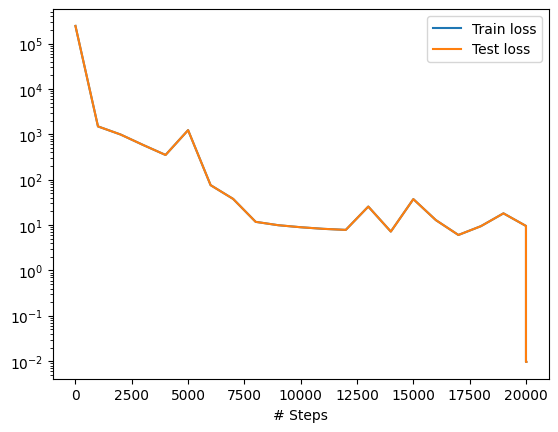

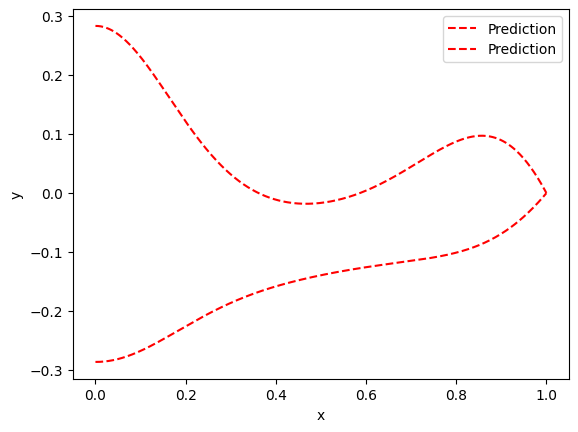

Training for omega = 2.0
Compiling model...
Building feed-forward neural network...
'build' took 0.063613 s

'compile' took 2.622825 s

Training model...

Step      Train loss                                                      Test loss                                                       Test metric
0         [1.34e+05, 1.12e+05, 1.38e+01, 2.31e+00, 1.50e-01, 1.80e-02]    [1.34e+05, 1.12e+05, 1.38e+01, 2.31e+00, 1.50e-01, 1.80e-02]    []  
1000      [1.65e+04, 3.70e+04, 1.16e+00, 8.52e+00, 7.92e+01, 2.90e+01]    [1.65e+04, 3.70e+04, 1.16e+00, 8.52e+00, 7.92e+01, 2.90e+01]    []  
2000      [1.07e+03, 1.80e+03, 1.25e+00, 3.09e+00, 1.46e+02, 4.64e+01]    [1.07e+03, 1.80e+03, 1.25e+00, 3.09e+00, 1.46e+02, 4.64e+01]    []  
3000      [3.30e+02, 4.37e+02, 2.28e+00, 7.32e+00, 2.77e+00, 1.13e+02]    [3.30e+02, 4.37e+02, 2.28e+00, 7.32e+00, 2.77e+00, 1.13e+02]    []  
4000      [1.14e+01, 2.42e+01, 1.20e-01, 2.46e-03, 3.89e-02, 1.14e+01]    [1.14e+01, 2.42e+01, 1.20e-01, 2.46e-03, 3.89e-02

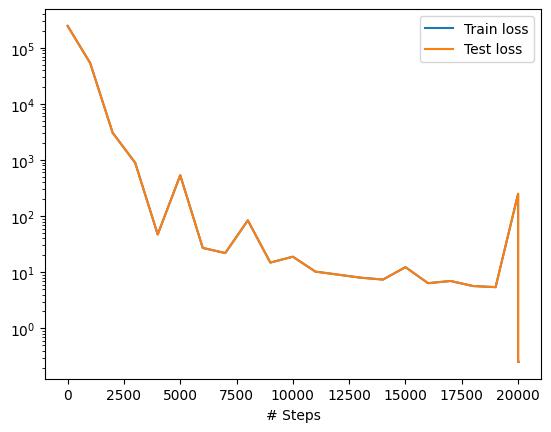

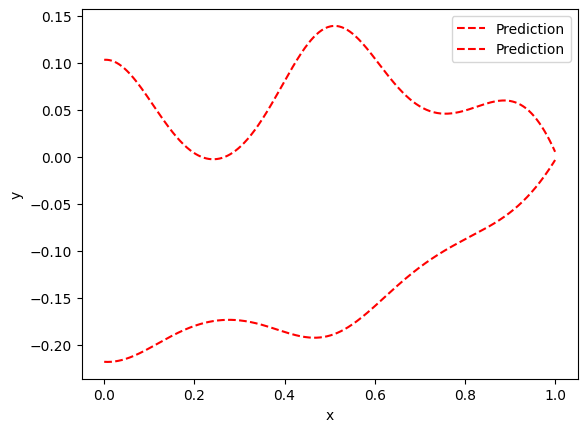

Training for omega = 3.0
Compiling model...
Building feed-forward neural network...
'build' took 0.063657 s

'compile' took 3.304257 s

Training model...

Step      Train loss                                                      Test loss                                                       Test metric
0         [1.34e+05, 1.12e+05, 1.38e+01, 2.31e+00, 1.50e-01, 1.80e-02]    [1.34e+05, 1.12e+05, 1.38e+01, 2.31e+00, 1.50e-01, 1.80e-02]    []  
1000      [1.66e+04, 2.15e+04, 1.86e+00, 3.45e+02, 1.22e+02, 4.10e+02]    [1.66e+04, 2.15e+04, 1.86e+00, 3.45e+02, 1.22e+02, 4.10e+02]    []  
2000      [1.16e+04, 1.79e+04, 1.02e+02, 5.81e+02, 1.37e+02, 1.65e+03]    [1.16e+04, 1.79e+04, 1.02e+02, 5.81e+02, 1.37e+02, 1.65e+03]    []  
3000      [1.07e+04, 1.62e+04, 1.32e+02, 6.41e+02, 5.30e+02, 2.54e+03]    [1.07e+04, 1.62e+04, 1.32e+02, 6.41e+02, 5.30e+02, 2.54e+03]    []  
4000      [5.48e+03, 6.20e+03, 1.89e+01, 1.32e+02, 1.04e+03, 3.18e+03]    [5.48e+03, 6.20e+03, 1.89e+01, 1.32e+02, 1.04e+03

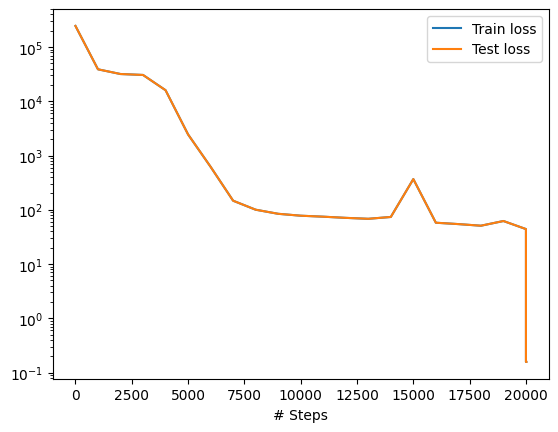

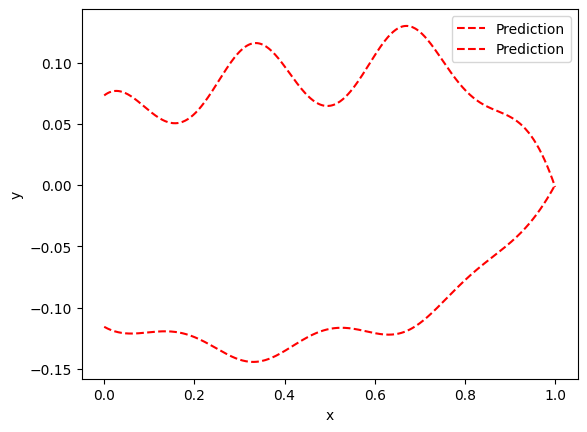

In [19]:
omega_values = [1.0, 2.0, 3.0]
results = {}

for omega in omega_values:
  print(f"Training for omega = {omega}")

  def ode_wrapped(n , y):
    return ode_system(n, y, omega)

  # Define PDE problem
  data = dde.data.PDE(
      geom,
      ode_wrapped,
      [bc_Tf_right, bc_Ts_right, bc_Tf_left, bc_Ts_left],
      num_domain=500,
      num_boundary=20,
  )
  # print("The training set is {}".format(data.train_x_all.T))

  nn = dde.maps.FNN([1] + [100]*3 + [2], "swish", "Glorot normal") #tanh/swish/sin
  model = dde.Model(data, nn)

  # Compile and train
  loss_weights = [1e3, 1e3,  # PDE equations (eqn1, eqn2)
               1e4, 1e4,    # Dirichlet BCs (T_f, T_s at x=1)
               1e2, 1e2]    # Neumann BCs (dT_f/dx, dT_s/dx at x=0)

  lambda1 = tf.Variable(1.0, dtype=tf.float32, trainable=True)
  lambda2 = tf.Variable(1.0, dtype=tf.float32, trainable=True)

  model.compile("adam", lr=0.001, loss_weights=loss_weights, external_trainable_variables=[lambda1, lambda2])
  losshistory, train_state = model.train(iterations=20000, display_every=1000)

  # Refine training with L-BFGS
  model.compile("L-BFGS-B")
  losshistory, train_state = model.train()

  # Save and plot results
  dde.saveplot(losshistory, train_state, issave=True, isplot=True)
  n = np.linspace(0, 1, 50).reshape(-1, 1)
  T_pred = model.predict(n)

  T_f_pred = T_pred[:, 0:1]
  T_s_pred = T_pred[:, 1:2]

  results[omega] = (n.flatten(), T_f_pred, T_s_pred)

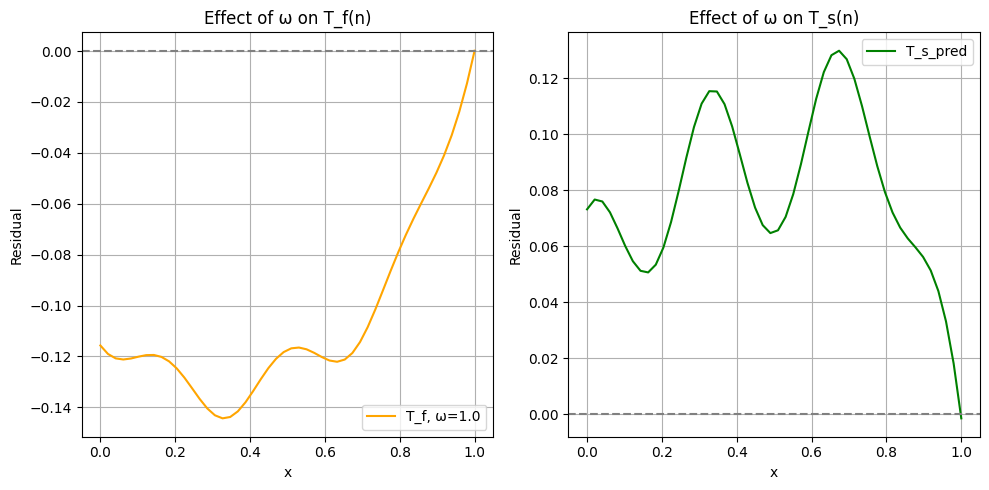

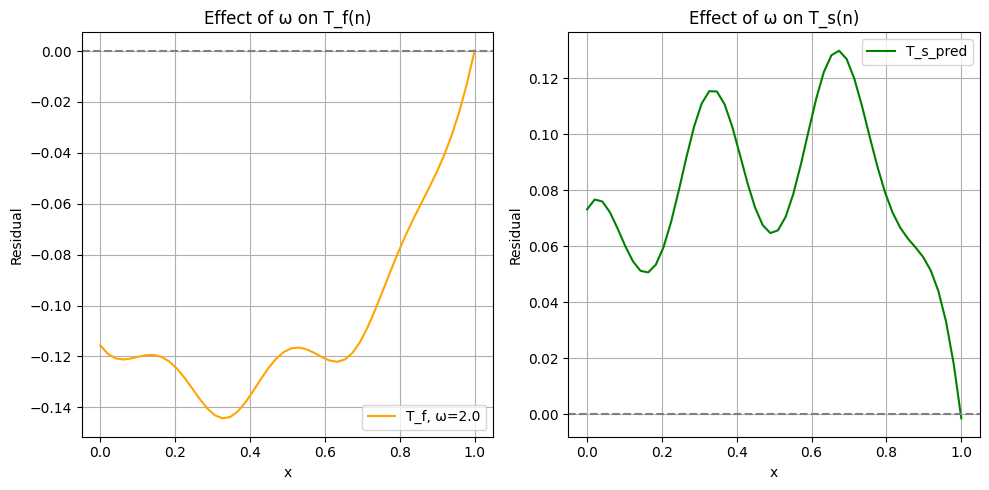

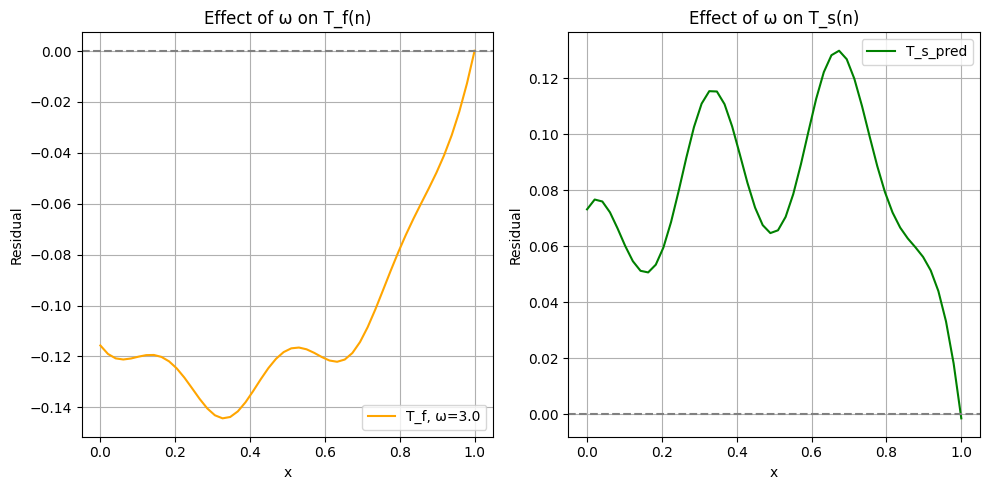

In [20]:
for omega, (n, T_f, T_s) in results.items():
  plt.figure(figsize=(10, 5))

  plt.subplot(1, 2, 1)
  plt.plot(n, T_f_pred, label=f"T_f, ω={omega}",color="orange")
  plt.axhline(0, color="gray", linestyle="--")
  plt.xlabel("x")
  plt.ylabel("Residual")
  plt.title("Effect of ω on T_f(n)")
  plt.grid(True)
  plt.legend()

  plt.subplot(1, 2, 2)
  plt.plot(n, T_s_pred, label="T_s_pred", color="green")
  plt.axhline(0, color="gray", linestyle="--")
  plt.xlabel("x")
  plt.ylabel("Residual")
  plt.title("Effect of ω on T_s(n)")
  plt.grid(True)
  plt.legend()

  plt.tight_layout()
  plt.show()
